In [1]:
import numba
import sys
sys.path.insert(0, '../../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers
import imp

In [2]:
%matplotlib inline

In [3]:
from save_data import load_pickle_zip
model_ = load_pickle_zip("../models/models/2d_spin_glass_large.pkl")
res_ex = load_pickle_zip("../models/solutions/2d_spin_glass.pkl")

In [4]:
betas = res_ex["betas"]

In [5]:
import solvers
imp.reload(solvers)

res_nn = solvers.nn_sol(model_, betas, max_step=1000, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn["name"]="nn"

fe: -7.028 std_fe: 9.60E-03 M: 0.008 S: 0.684 E: -0.190: 0.0262, B1 = -0.003
fe: -3.653 std_fe: 1.78E-02 M: 0.009 S: 0.658 E: -0.364: 0.0242, B1 = -0.019
fe: -2.583 std_fe: 2.38E-02 M: 0.009 S: 0.621 E: -0.511: 0.025, B1 = -0.006
fe: -2.081 std_fe: 2.85E-02 M: 0.010 S: 0.577 E: -0.639: 0.0256, B1 = -0.013
fe: -1.804 std_fe: 3.14E-02 M: 0.014 S: 0.529 E: -0.746: 0.0288, B1 = 0.008
fe: -1.635 std_fe: 3.31E-02 M: 0.016 S: 0.479 E: -0.837: 0.0303, B1 = -0.028
fe: -1.527 std_fe: 3.17E-02 M: 0.180 S: 0.420 E: -0.927: 0.184, B1 = -0.013
fe: -1.462 std_fe: 2.23E-02 M: 0.470 S: 0.334 E: -1.044: 0.466, B1 = 0.199
fe: -1.419 std_fe: 1.76E-02 M: 0.580 S: 0.278 E: -1.110: 0.579, B1 = 1.079
fe: -1.391 std_fe: 1.42E-02 M: 0.652 S: 0.234 E: -1.157: 0.655, B1 = 1.591
fe: -1.371 std_fe: 1.22E-02 M: 0.700 S: 0.200 E: -1.189: 0.7, B1 = 2.0177
fe: -1.357 std_fe: 1.01E-02 M: 0.738 S: 0.171 E: -1.215: 0.745, B1 = 2.457
fe: -1.347 std_fe: 8.69E-03 M: 0.764 S: 0.150 E: -1.231: 0.766, B1 = 2.842
fe: -1.339 std_

In [6]:
res_nn_z2 = solvers.nn_sol(model_, betas, max_step=1000,
                           bias = True, z2 = True, x_hat_clip = False)
res_nn_z2["name"]="nn_z2"

fe: -7.028 std_fe: 9.20E-03 M: 0.008 S: 0.684 E: -0.190: 0.0262, B1 = -0.002
fe: -3.654 std_fe: 1.66E-02 M: 0.009 S: 0.658 E: -0.363: 0.0247, B1 = 0.017
fe: -2.583 std_fe: 2.25E-02 M: 0.009 S: 0.620 E: -0.517: 0.0296, B1 = -0.025
fe: -2.083 std_fe: 2.63E-02 M: 0.009 S: 0.575 E: -0.646: 0.0237, B1 = -0.007
fe: -1.808 std_fe: 2.83E-02 M: 0.008 S: 0.523 E: -0.762: 0.0237, B1 = -0.027
fe: -1.641 std_fe: 2.87E-02 M: 0.009 S: 0.468 E: -0.862: 0.0262, B1 = 0.034
fe: -1.537 std_fe: 2.69E-02 M: 0.013 S: 0.404 E: -0.960: 0.0239, B1 = -0.061
fe: -1.470 std_fe: 2.20E-02 M: 0.008 S: 0.340 E: -1.045: 0.0244, B1 = -0.492
fe: -1.427 std_fe: 1.71E-02 M: 0.008 S: 0.284 E: -1.111: 0.0498, B1 = -1.113
fe: -1.398 std_fe: 1.43E-02 M: 0.010 S: 0.241 E: -1.157: 0.039, B1 = -1.496
fe: -1.377 std_fe: 1.19E-02 M: 0.004 S: 0.206 E: -1.190: 0.036, B1 = -2.021
fe: -1.363 std_fe: 1.05E-02 M: 0.011 S: 0.179 E: -1.213: 0.0136, B1 = -2.392
fe: -1.352 std_fe: 8.64E-03 M: 0.012 S: 0.159 E: -1.230: 0.0196, B1 = -2.718
fe:

In [7]:
res_nn_is = solvers.nn_sol(model_, betas, max_step=1000,
                           bias = True, z2 = False, x_hat_clip = False, i_sampling=True)
res_nn_is["name"]="nn_is"

fe: -7.028 std_fe: 6.72E-05 M: -0.133 S: 0.683 E: -0.194 0.0234, B1 = -0.002
fe: -3.657 std_fe: 1.36E-04 M: 0.170 S: 0.656 E: -0.376: 0.0294, B1 = -0.003
fe: -2.591 std_fe: 2.16E-04 M: -0.358 S: 0.614 E: -0.544 0.027, B1 = -0.003
fe: -2.097 std_fe: 3.52E-04 M: 0.085 S: 0.564 E: -0.686: 0.0225, B1 = 0.010
fe: -1.829 std_fe: 6.27E-04 M: -0.186 S: 0.509 E: -0.810 0.0224, B1 = -0.009
fe: -1.668 std_fe: 1.02E-03 M: 0.001 S: 0.453 E: -0.913: 0.0294, B1 = 0.001
fe: -1.569 std_fe: 4.61E-03 M: -0.338 S: 0.389 E: -1.013 0.129, B1 = -0.024
fe: -1.489 std_fe: 2.24E-03 M: -4.144 S: 0.359 E: -1.040 0.478, B1 = -0.384
fe: -1.447 std_fe: 4.04E-03 M: -9.770 S: 0.329 E: -1.082 0.575, B1 = -1.082
fe: -1.437 std_fe: 1.36E-02 M: -17.202 S: 0.214 E: -1.2230.648, B1 = -1.611
fe: -1.390 std_fe: 3.69E-03 M: -5.253 S: 0.209 E: -1.200 0.701, B1 = -2.032
fe: -1.370 std_fe: 2.64E-03 M: 0.659 S: 0.189 E: -1.212: 0.744, B1 = -2.387
fe: -1.358 std_fe: 2.27E-03 M: -3.309 S: 0.161 E: -1.234 0.764, B1 = -2.755
fe: -1.34

In [8]:
import bp_solver
imp.reload(bp_solver)
import solvers
imp.reload(solvers)
res_bp = solvers.bp_sol(model_, betas, val_rand=0.1)
res_bp["name"]="bp"

fe: -7.028, ener: -0.193, M: 0.000, iter 9
fe: -3.657, ener: -0.375, M: 0.000, iter 12
fe: -2.591, ener: -0.541, M: 0.000, iter 15
fe: -2.097, ener: -0.687, M: 0.000, iter 20
fe: -1.828, ener: -0.812, M: 0.000, iter 28
fe: -1.668, ener: -0.919, M: 0.000, iter 43
fe: -1.567, ener: -1.008, M: 0.000, iter 103
fe: -1.502, ener: -1.083, M: 0.064, iter 1000
fe: -1.458, ener: -1.142, M: 0.213, iter 1000
fe: -1.446, ener: -1.196, M: 0.359, iter 1000
fe: -1.420, ener: -1.203, M: 0.463, iter 1000
fe: -1.395, ener: -1.227, M: 0.531, iter 1000
fe: -1.408, ener: -1.267, M: 0.598, iter 1000
fe: -1.371, ener: -1.290, M: 0.646, iter 1000
fe: -1.336, ener: -1.300, M: 0.710, iter 1000
fe: -1.401, ener: -1.324, M: 0.764, iter 1000
fe: -1.359, ener: -1.288, M: 0.680, iter 1000
fe: -1.331, ener: -1.314, M: 0.766, iter 1000
fe: -1.346, ener: -1.316, M: 0.833, iter 1000


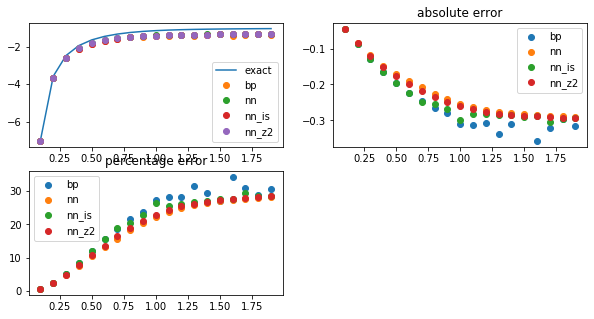

In [9]:
%matplotlib inline
import imp
imp.reload(solvers)
label="fe"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is, res_nn_z2], init_=0)
#plt.ylim(-0.001,0.11)
plt.show()

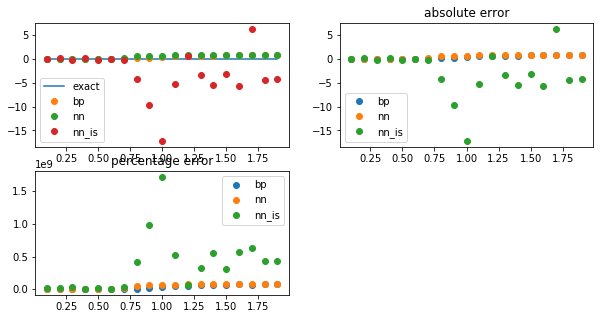

In [10]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is])
plt.show()

ValueError: operands could not be broadcast together with shapes (19,100) (19,16) 

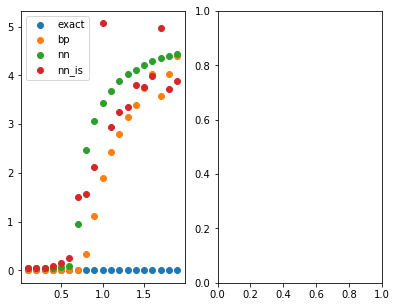

In [11]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn, res_nn_is], init_=0)
plt.show()

In [ ]:
import solvers
imp.reload(solvers)
plt = solvers.plot_all_corr(betas[0:6], res_ex, [res_bp, res_nn, res_nn_is], model_.J_interaction)
plt.show()